# EDA Case Study
We will be studying loan application data and attempting to draw conclusions from them regarding which loan application should be approved and which shouldn't be.
This case study is being attempted by:

- Ankit Singh

In [1]:
#Importing python pandas, numpy, and visualization libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing pandas profiling
pd.options.display.max_columns = 100
pd.options.display.max_rows = 125

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('application_data.csv')

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

Checking for duplicates in SK_ID_CURR column

In [8]:
df['SK_ID_CURR'].duplicated().sum()

0

Checking for null values in the dataframe

In [9]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

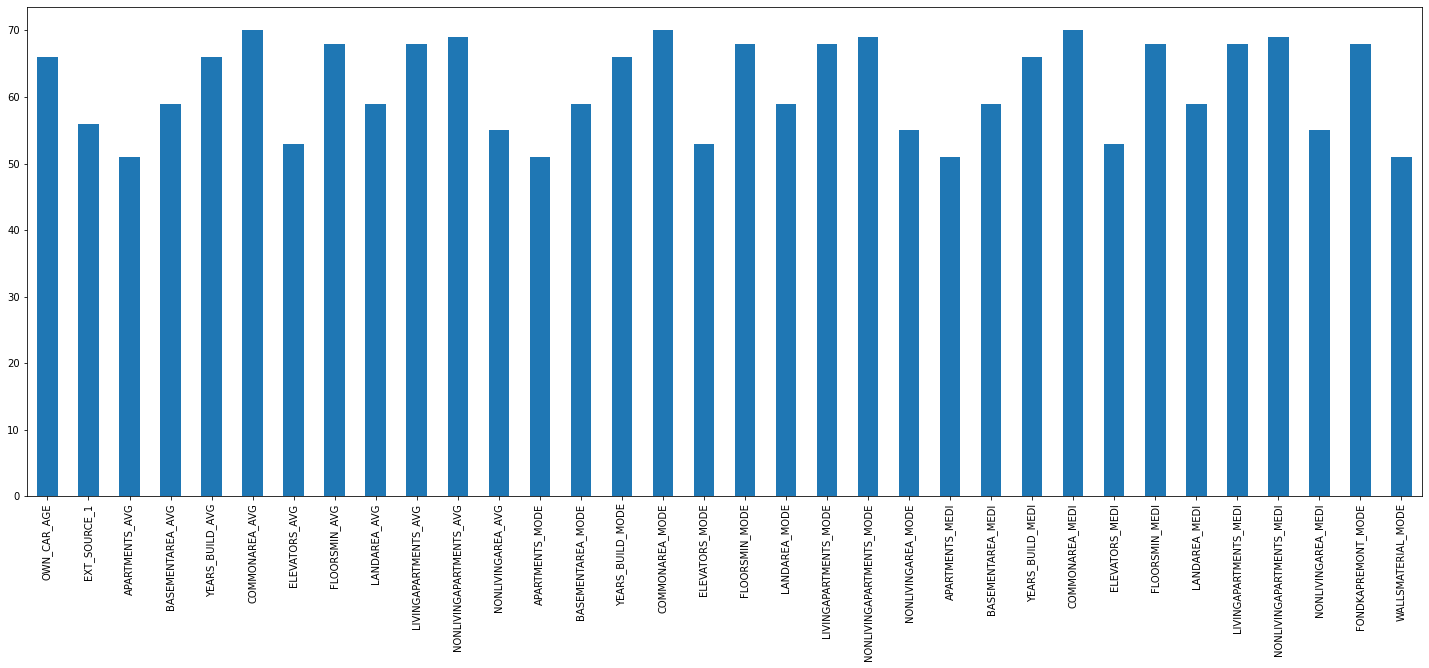

In [10]:
# Calculating percentage of missing values per column
percentage_null_columns = round(df.isnull().sum()/len(df.index),2)*100
plt.figure(figsize=(25,9))
b = percentage_null_columns[percentage_null_columns.values > 50].plot(kind='bar')
plt.show()

As you can see from the chart above, there are many columns with more than 50% of null values. We will be dropping all these columns as infering values for nearly 50% data will be very cumbersome.

In [11]:
#Dropping all the columns with only null values
df.dropna(axis=1,how='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Sing

In [12]:
# Dropping the columns containing more than 50% of null values
df = df.loc[:,percentage_null_columns<50]

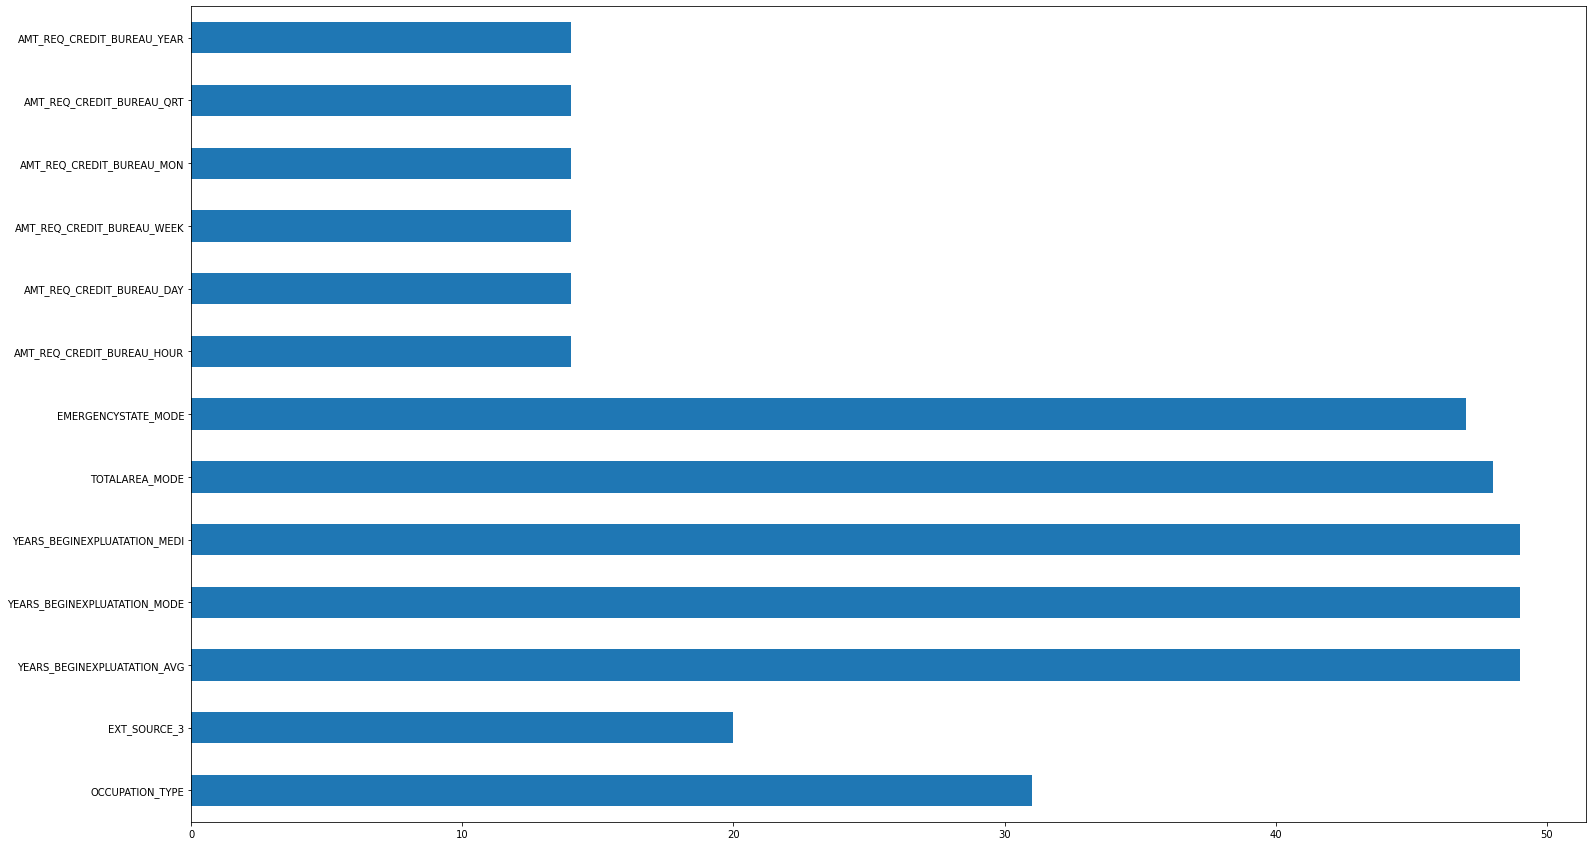

In [13]:
percentage_null_values = round(df.isnull().sum()/len(df.index),2)*100
plt.figure(figsize=(25,15))
b = percentage_null_values[percentage_null_values > 0].plot(kind='barh')

plt.show()

As you can still see, we still have a high percentage of null values.

In [14]:
df.shape

(307511, 78)

In [15]:
print(len(list(df.columns)))

78


Let us create a subset from this with the columns we think are relevant for the analysis.

In [16]:
relevant_cols = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','ORGANIZATION_TYPE']
ndf = df[relevant_cols]
ndf.head()
ndf.shape

(307511, 26)

In [17]:
# Again Calculating the % of missing values in each column
round(ndf.isna().sum()/len(ndf.index),2)*100

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
NAME_TYPE_SUITE                 0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
OCCUPATION_TYPE                31.0
CNT_FAM_MEMBERS                 0.0
REGION_RATING_CLIENT            0.0
REGION_RATING_CLIENT_W_CITY     0.0
REG_REGION_NOT_LIVE_REGION      0.0
ORGANIZATION_TYPE               0.0
dtype: float64

There are still 31% null values in OCCUPATION_TYPE column. Let us see what those values are.

In [18]:
ndf[ndf['OCCUPATION_TYPE'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,-7427.0,-3514,NaN,2.0,2,2,0,XNA
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,-5246.0,-2512,NaN,2.0,2,2,0,XNA
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,-9012.0,-3684,NaN,2.0,3,3,0,XNA
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,-9994,-1796,-4668.0,-2661,NaN,1.0,1,1,0,Military
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-15280,-2668,-5266.0,-3787,NaN,2.0,2,2,0,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,-16010,-1185,-5034.0,-4392,NaN,3.0,1,1,0,Business Entity Type 2
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-23125,365243,-5485.0,-4115,NaN,2.0,2,2,0,XNA
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-20390,-5326,-157.0,-3906,NaN,2.0,2,2,0,Business Entity Type 3
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,-7369.0,-2357,NaN,1.0,2,2,0,XNA


We see that OCCUPATION_TYPE has NaN values. We can replace these with the string "None" as a value.

In [19]:
ndf['OCCUPATION_TYPE'].fillna("None", inplace=True)

In [20]:
round(ndf.isna().sum()/len(ndf.index),2)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
ORGANIZATION_TYPE              0.0
dtype: float64

Now we see that there are no null values left. So let's proceed with understanding the datatypes of the columns.

In [21]:
#Checking for datatype change in the selection list
#Checking info of all columns and find out the column having data type mismatches
ndf.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
REG_REGION_NOT_LIVE_REGION       int64
ORGANIZATION_TYPE        

If we understand the data description correctly, a few columns don't match with their datatypes.
DAYS_REGISTRATION,  shouldn't be an object.

In [22]:
#Converting Family Member Count to int from float
ndf['CNT_FAM_MEMBERS'].replace(np.NaN, '0').astype('int64')

0         1
1         2
2         1
3         2
4         1
         ..
307506    1
307507    1
307508    1
307509    2
307510    2
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: int64

In [23]:
#Converting Registration Days to int from float
ndf['DAYS_REGISTRATION'].replace(np.NaN,None).astype('int64')

0        -3648
1        -1186
2        -4260
3        -9833
4        -4311
          ... 
307506   -8456
307507   -4388
307508   -6737
307509   -2562
307510   -5128
Name: DAYS_REGISTRATION, Length: 307511, dtype: int64

In [24]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Time to work on figuring out the normal distribution and dealing with outliers.

The easiest way to do this is through boxplot representations.

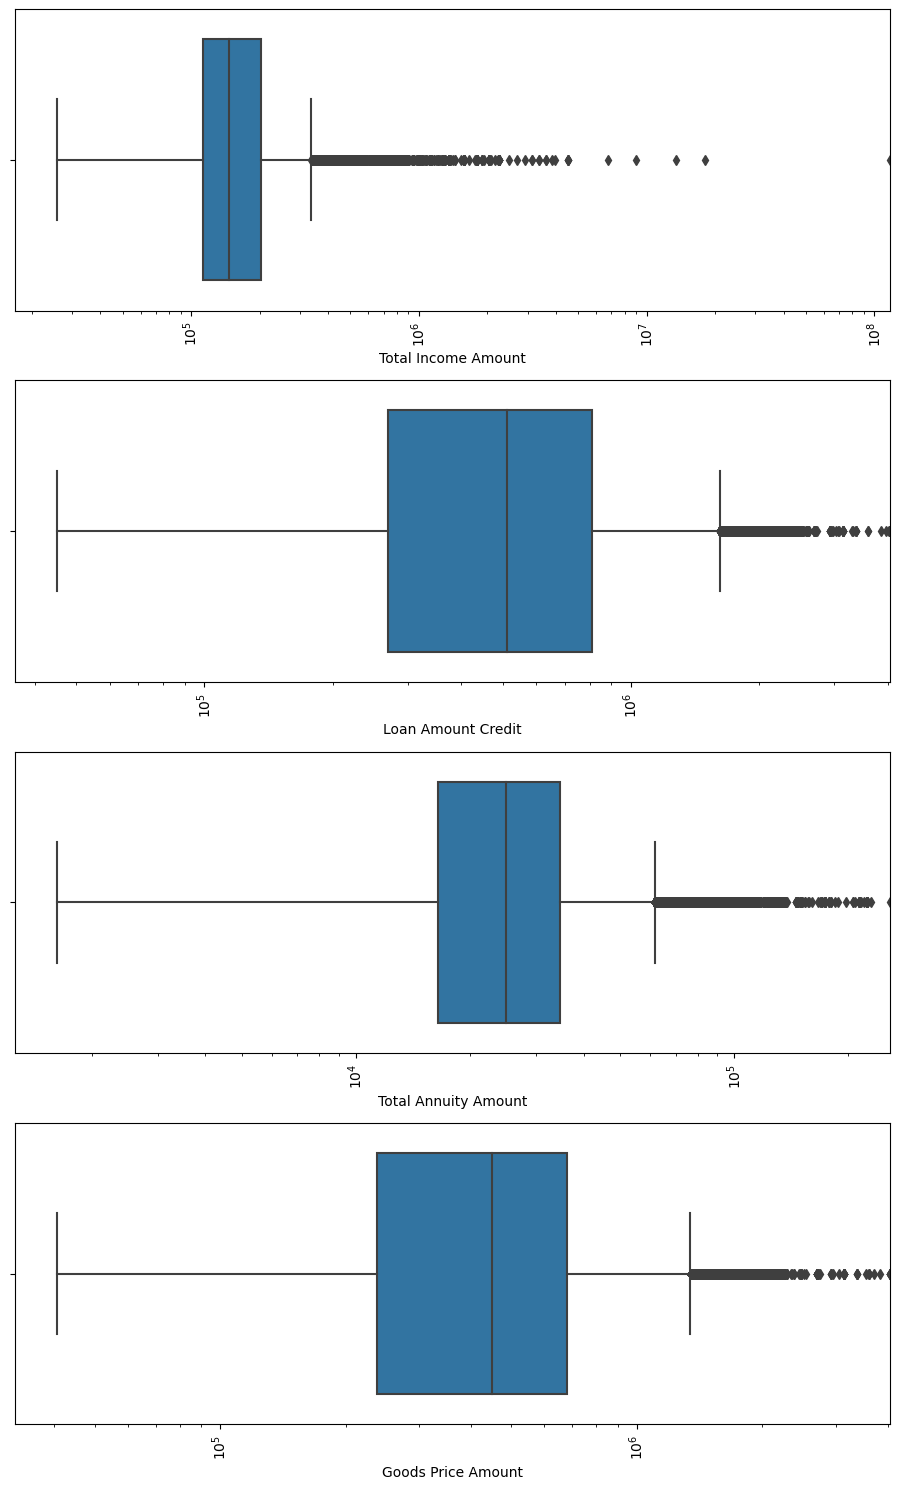

In [25]:
# Finding outliers in the data using boxplot    
plt.figure(figsize=(18, 15), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(4, 2, 1)
total_income_amount = ndf[["AMT_INCOME_TOTAL"]]
sns.boxplot(x=total_income_amount['AMT_INCOME_TOTAL']).set(xscale = 'log')
plt.xlim([0, max(total_income_amount['AMT_INCOME_TOTAL'])])
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Total Income Amount')

plt.subplot(4, 2, 3)
credit_amount = ndf[["AMT_CREDIT"]]
sns.boxplot(x=credit_amount['AMT_CREDIT']).set(xscale = 'log')
plt.xlim([0, max(credit_amount['AMT_CREDIT'])])
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Loan Amount Credit')

plt.subplot(4, 2, 5)
annuity_amount = ndf[["AMT_ANNUITY"]]
sns.boxplot(x=annuity_amount['AMT_ANNUITY']).set(xscale = 'log')
plt.xlim([0, max(annuity_amount['AMT_ANNUITY'])])
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Total Annuity Amount')

plt.subplot(4, 2, 7)
goods_price_amount = ndf[["AMT_GOODS_PRICE"]]
sns.boxplot(x=goods_price_amount['AMT_GOODS_PRICE']).set(xscale = 'log')
plt.xlim([0, max(goods_price_amount['AMT_GOODS_PRICE'])])
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Goods Price Amount')

plt.tight_layout()

plt.show()

#### As we can see there are many outliers in the above shown columns

For treating the outliers for atleast 3 variables in numerical columns, we can follow any of the following methods:

- *Using Capping* 
- *IQR*
- *Percentile method*

**Suitable method of imputations. Inter-quartile range methodology can be followed**

All the *days* columns are having negative values so it will be better to convert them to *years*.

In [26]:
ndf.loc[:,['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']] = abs(ndf.loc[:,['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']])


In [27]:
days_to_years = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
ndf.loc[:,days_to_years] = ndf.loc[:,days_to_years].apply(lambda x:(x/365))

Excluding DAYS_EMPLOYED having values greater than 100

In [28]:
ndf.DAYS_EMPLOYED.where(ndf.DAYS_EMPLOYED.between(1,100))
ndf.DAYS_EMPLOYED = ndf.DAYS_EMPLOYED.where(ndf.DAYS_EMPLOYED.between(1,100))
ndf.DAYS_EMPLOYED.describe()

count    224233.000000
mean          7.270305
std           6.420169
min           1.000000
25%           2.808219
50%           5.202740
75%           9.424658
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

Excluding XNA values from gender since it should have standardised values only.

In [29]:
ndf.loc[:,'CODE_GENDER'] =  ndf.loc[:,'CODE_GENDER'].replace('XNA',np.nan)
ndf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,2,2,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,NaN,11.671233,6.934247,Laborers,1.0,2,2,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,2,2,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,2,2,0,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,25.553425,NaN,23.167123,5.430137,Sales staff,1.0,1,1,0,Services
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,56.917808,NaN,12.021918,11.205479,None,1.0,2,2,0,XNA
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,41.002740,21.701370,18.457534,14.109589,Managers,1.0,3,3,0,School
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,32.769863,13.112329,7.019178,2.550685,Laborers,2.0,2,2,0,Business Entity Type 1


#### Binning of continuous variables
Converting numerical variables to categorical variables.

In [30]:
#Loan Amount Credit Vs Annual Income     
ndf['Loan_Credit_Income_Ratio']= ndf['AMT_CREDIT']/ndf['AMT_INCOME_TOTAL']
ndf

#Binning Loan Amount Credit 
ndf[['AMT_CREDIT']].describe()
bins = [0.0000, 500000.0000, 1000000.0000,ndf['AMT_CREDIT'].max()]
slot = ['0 - 500000', '500000-1000000','1000000 and above']
ndf['loan_amnt_range'] = pd.cut(ndf['AMT_CREDIT'], bins, labels=slot)
ndf


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Loan_Credit_Income_Ratio,loan_amnt_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,2,2,0,Business Entity Type 3,2.007889,0 - 500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,NaN,11.671233,6.934247,Laborers,1.0,2,2,0,Government,2.000000,0 - 500000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,2,2,0,Business Entity Type 3,2.316167,0 - 500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,2,2,0,Religion,4.222222,500000-1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,25.553425,NaN,23.167123,5.430137,Sales staff,1.0,1,1,0,Services,1.617143,0 - 500000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,56.917808,NaN,12.021918,11.205479,None,1.0,2,2,0,XNA,3.743750,0 - 500000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,41.002740,21.701370,18.457534,14.109589,Managers,1.0,3,3,0,School,4.429176,500000-1000000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,32.769863,13.112329,7.019178,2.550685,Laborers,2.0,2,2,0,Business Entity Type 1,2.164368,0 - 500000


In [31]:
#Binning Person Total Income Amount 
ndf[['AMT_INCOME_TOTAL']].describe()
bins = [0, 50000.0000, 100000.0000, 150000.0000, 200000.0000,250000.0000, 300000.0000, ndf['AMT_INCOME_TOTAL'].max()]
slot = ['0 - 50000', '50000-100000','100000-150000','150000-200000', '200000-250000',  '250000-300000','300000 and above']
ndf['income_amnt_range'] = pd.cut(ndf['AMT_INCOME_TOTAL'], bins, labels=slot)
ndf[['AMT_CREDIT']].describe()

,AMT_CREDIT
count,3.075110e+05
mean,5.990260e+05
std,4.024908e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.135310e+05
75%,8.086500e+05
max,4.050000e+06


#### Computing Imbalance Percentage
An imbalanced dataset can skew the results of the analysis and will hinder procurement of relevant insights.

In [32]:
#Calculating class imbalance by finding the percentage of 1s and 0s in Target Column

target_1 = round((ndf[ndf.TARGET == 1].shape[0])/ndf.TARGET.shape[0]*100,2)
target_0 = round((ndf[ndf.TARGET == 0].shape[0])/ndf.TARGET.shape[0]*100,2)
print("Percentage of 1s: " +str(target_1),"and 0s: "+str(target_0))
if (target_1 != target_0):
    print("The ratio of 1s and 0s is imbalanced in the dataset.")
else:
    print("The ratio of 1s and 0s is balanced in the dataset.")

Percentage of 1s: 8.07 and 0s: 91.93
The ratio of 1s and 0s is imbalanced in the dataset.


**Since the dataset is clearly imbalanced in favor of 0s, let us divide the dataset into two subsets based on Target column values.**

In [33]:
subset_df_tar0 = ndf.loc[ndf['TARGET'] == 0]
subset_df_tar1 = ndf.loc[ndf['TARGET'] == 1]
subset_df_tar1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Loan_Credit_Income_Ratio,loan_amnt_range,income_amnt_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,2,2,0,Business Entity Type 3,2.007889,0 - 500000,200000-250000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,51.298630,7.200000,18.008219,5.005479,Cooking staff,1.0,3,2,0,Business Entity Type 3,8.711040,500000-1000000,100000-150000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,47.895890,3.457534,3.238356,2.819178,Laborers,2.0,2,2,0,Business Entity Type 3,5.894222,1000000 and above,200000-250000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,36.668493,9.854795,0.123288,12.079452,Sales staff,2.0,3,3,0,Self-employed,2.139800,0 - 500000,100000-150000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,67.928767,NaN,14.769863,11.504110,None,2.0,2,2,0,XNA,3.111111,0 - 500000,50000-100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,27.172603,8.350685,23.306849,7.068493,Laborers,3.0,3,3,0,Business Entity Type 3,2.173913,0 - 500000,200000-250000
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,36.756164,6.589041,1.369863,12.887671,Laborers,3.0,2,2,0,Construction,9.050000,1000000 and above,100000-150000
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Family,Working,Secondary / secondary special,Married,House / apartment,56.558904,8.621918,24.441096,10.498630,Managers,2.0,2,2,0,Business Entity Type 3,1.320000,0 - 500000,200000-250000
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,45.126027,NaN,22.715068,0.024658,Sales staff,2.0,2,2,0,Business Entity Type 3,2.316800,500000-1000000,200000-250000


In [34]:
subset_df_tar0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Loan_Credit_Income_Ratio,loan_amnt_range,income_amnt_range
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,NaN,11.671233,6.934247,Laborers,1.0,2,2,0,Government,2.000000,0 - 500000,50000-100000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,2,2,0,Business Entity Type 3,2.316167,0 - 500000,100000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,2,2,0,Religion,4.222222,500000-1000000,100000-150000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,46.413699,4.350685,13.616438,1.306849,Laborers,2.0,2,2,0,Other,4.954500,0 - 500000,50000-100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,66.805479,NaN,20.189041,6.457534,None,1.0,2,2,0,XNA,2.000000,0 - 500000,100000-150000
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,25.553425,NaN,23.167123,5.430137,Sales staff,1.0,1,1,0,Services,1.617143,0 - 500000,150000-200000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,56.917808,NaN,12.021918,11.205479,None,1.0,2,2,0,XNA,3.743750,0 - 500000,50000-100000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,41.002740,21.701370,18.457534,14.109589,Managers,1.0,3,3,0,School,4.429176,500000-1000000,150000-200000


#### Univariate analysis on  Numerical Variables

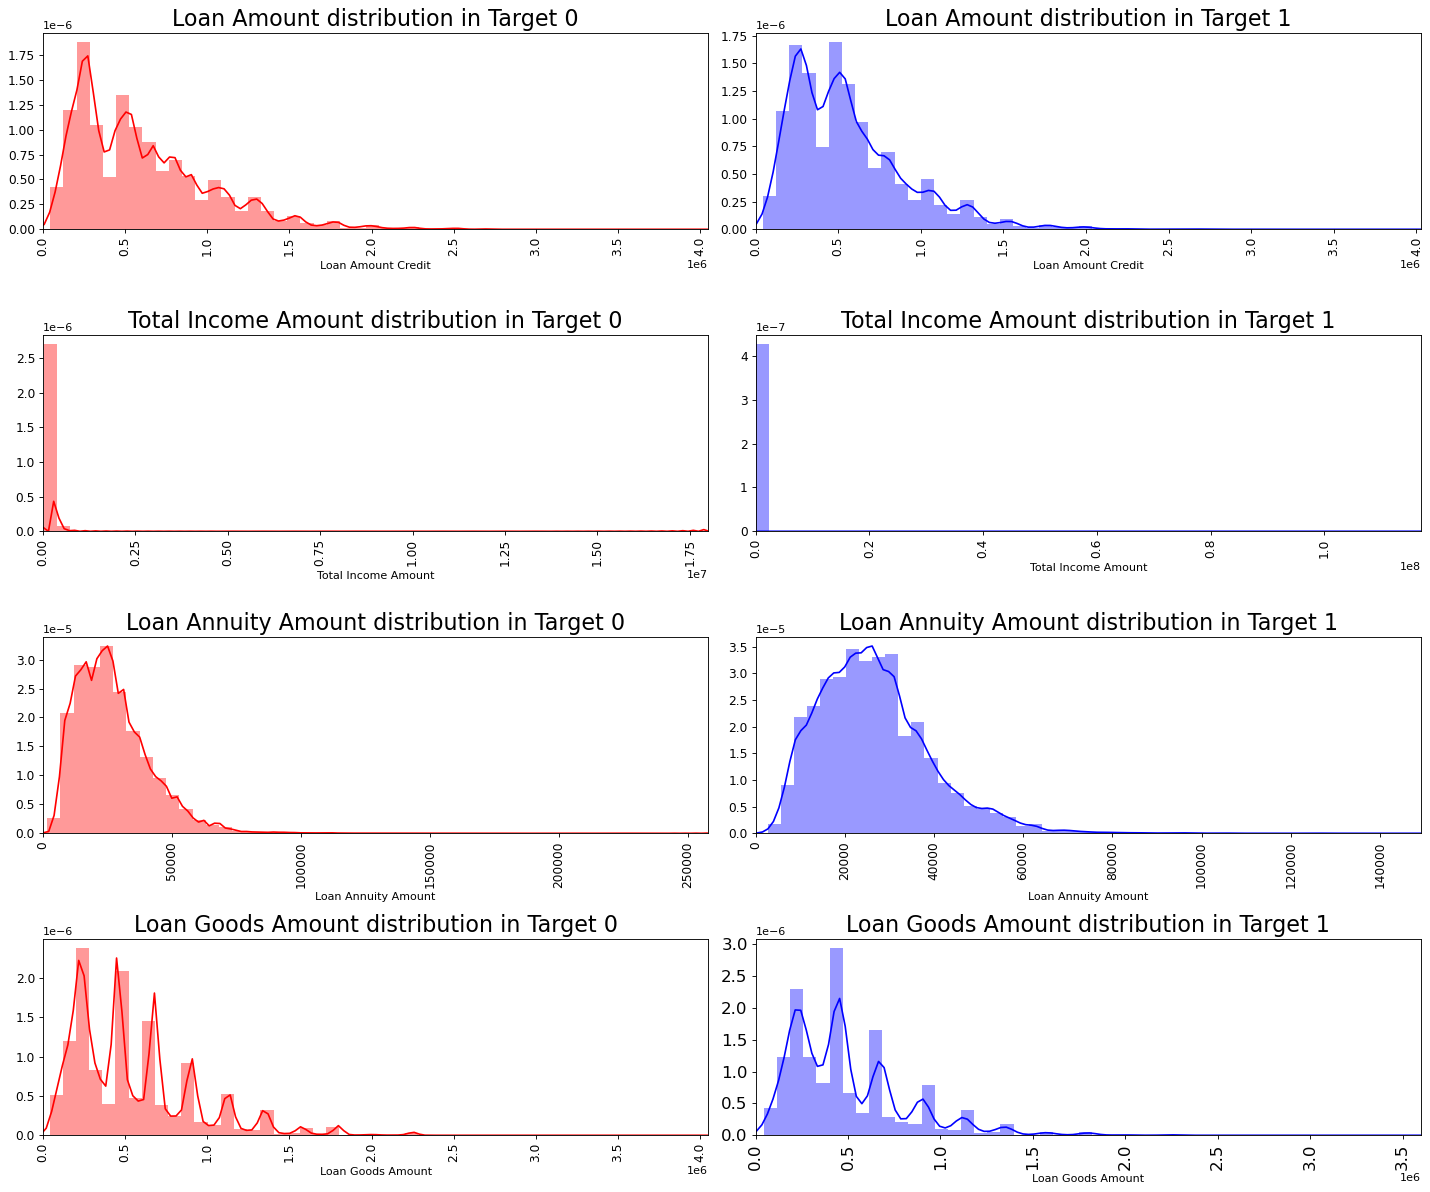

In [35]:
# Finding the frequency of AMT_CREDIT for Target = 0
subset_df_tar0.AMT_CREDIT.describe()
plt.figure(figsize=(18,15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: AMT_CREDIT
plt.subplot(4, 2, 1)
sns.distplot(subset_df_tar0['AMT_CREDIT'].dropna(), color='red')
plt.xlim([0,  max(subset_df_tar0['AMT_CREDIT'])])
plt.xlabel('Loan Amount Credit')
plt.title('Loan Amount distribution in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)

# Finding the frequency of AMT_CREDIT for Target = 1
# subplot 2: AMT_CREDIT
plt.subplot(4, 2, 2)
sns.distplot(subset_df_tar1['AMT_CREDIT'].dropna(), color='blue')
plt.xlim([0, max(subset_df_tar1['AMT_CREDIT'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Loan Amount Credit')
plt.title('Loan Amount distribution in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})


# Finding the frequency of AMT_INCOME_TOTAL for Target = 0
# subplot 3: AMT_INCOME_TOTAL
plt.subplot(4, 2, 3)
sns.distplot(subset_df_tar0['AMT_INCOME_TOTAL'].dropna(), color='red')
plt.xlim([0, max(subset_df_tar0['AMT_INCOME_TOTAL'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Total Income Amount')
plt.title('Total Income Amount distribution in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of AMT_INCOME_TOTAL for Target = 1
# subplot 4: AMT_INCOME_TOTAL
plt.subplot(4, 2, 4)
sns.distplot(subset_df_tar1['AMT_INCOME_TOTAL'].dropna(), color='blue')
plt.xlim([0,  max(subset_df_tar1['AMT_INCOME_TOTAL'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Total Income Amount')
plt.title('Total Income Amount distribution in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})


# Finding the frequency of AMT_ANNUITY for Target = 0
# subplot 5: AMT_ANNUITY
plt.subplot(4, 2, 5)
sns.distplot(subset_df_tar0['AMT_ANNUITY'].dropna(), color='red')
plt.xlim([0, max(subset_df_tar0['AMT_ANNUITY'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Loan Annuity Amount')
plt.title('Loan Annuity Amount distribution in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of AMT_ANNUITY for Target = 1
# subplot 6: AMT_ANNUITY
plt.subplot(4, 2, 6)
sns.distplot(subset_df_tar1['AMT_ANNUITY'].dropna(), color='blue')
plt.xlim([0,  max(subset_df_tar1['AMT_ANNUITY'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Loan Annuity Amount')
plt.title('Loan Annuity Amount distribution in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of AMT_GOODS_PRICE for Target = 0
# subplot 5: AMT_GOODS_PRICE
plt.subplot(4, 2, 7)
sns.distplot(subset_df_tar0['AMT_GOODS_PRICE'].dropna(), color='red')
plt.xlim([0, max(subset_df_tar0['AMT_GOODS_PRICE'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Loan Goods Amount')
plt.title('Loan Goods Amount distribution in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of AMT_GOODS_PRICE for Target = 1
# subplot 6: AMT_GOODS_PRICE
plt.subplot(4, 2, 8)
sns.distplot(subset_df_tar1['AMT_GOODS_PRICE'].dropna(), color='blue')
plt.xlim([0,  max(subset_df_tar1['AMT_GOODS_PRICE'])])
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)
plt.xlabel('Loan Goods Amount')
plt.title('Loan Goods Amount distribution in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

plt.tight_layout()
plt.show()

To begin with our analysis we have used Univariate Methodology on significant numerical variables present in our dataset: 
Inference from the above plot :
- No significant impact on the Defaulters and Non-defaulters list are observed when Client's Total Income and Loan Amount Credit are being considered for Analysis
- Similar observations are seen when compared with Client's Loan Annuity Amount and Loan Goods Amount

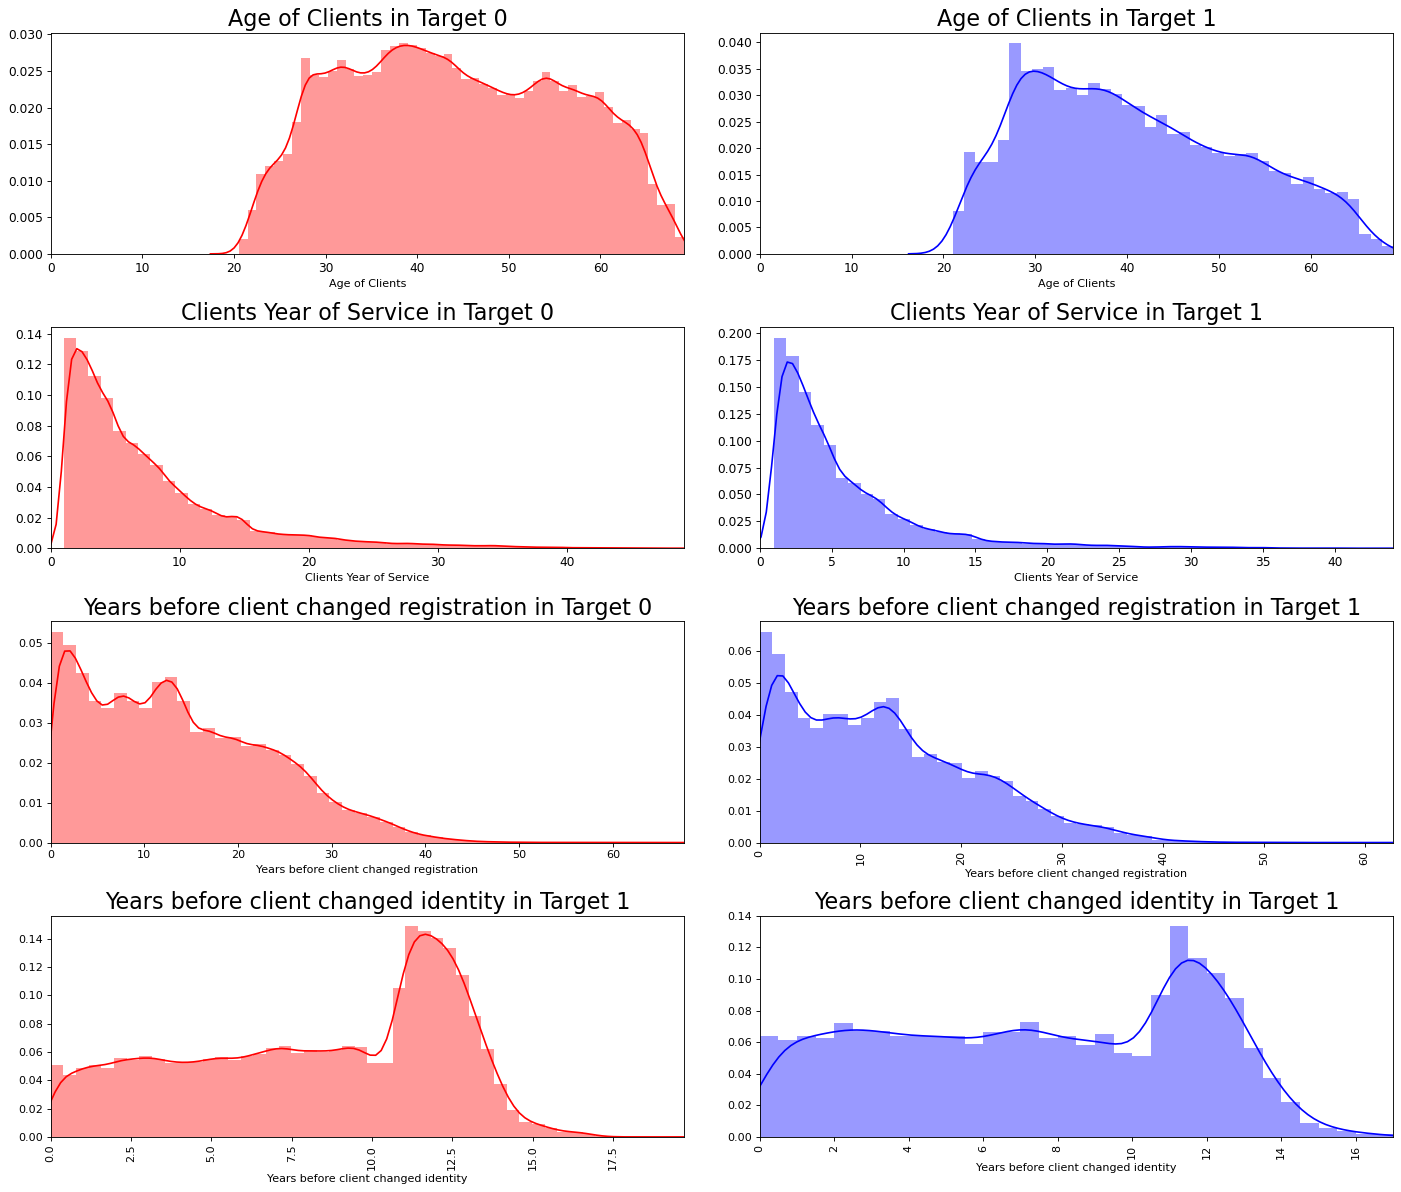

In [36]:
# Finding the frequency of DAYS_BIRTH for Target = 0

# adjust figure size
plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: DAYS_BIRTH
plt.subplot(4, 2, 1)
sns.distplot(subset_df_tar0['DAYS_BIRTH'].dropna(), color='red')
plt.xlim([0,  max(subset_df_tar0['DAYS_BIRTH'])])
plt.xlabel('Age of Clients')
plt.title('Age of Clients in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)

# Finding the frequency of DAYS_BIRTH for Target = 1
# subplot 2: DAYS_BIRTH
plt.subplot(4, 2, 2)
sns.distplot(subset_df_tar1['DAYS_BIRTH'].dropna(), color='blue')
plt.xlim([0, max(subset_df_tar1['DAYS_BIRTH'])])
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Age of Clients')
plt.title('Age of Clients in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})


# Finding the frequency of DAYS_EMPLOYED for Target = 0
# subplot 3: DAYS_EMPLOYED
plt.subplot(4, 2, 3)
sns.distplot(subset_df_tar0['DAYS_EMPLOYED'].dropna(), color='red')
plt.xlim([0, max(subset_df_tar0['DAYS_EMPLOYED'])])
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Clients Year of Service')
plt.title('Clients Year of Service in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of DAYS_EMPLOYED for Target = 1
# subplot 4: DAYS_EMPLOYED
plt.subplot(4, 2, 4)
sns.distplot(subset_df_tar1['DAYS_EMPLOYED'].dropna(), color='blue')
plt.xlim([0,max(subset_df_tar1['DAYS_EMPLOYED'])])
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Clients Year of Service')
plt.title('Clients Year of Service in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})


# Finding the frequency of DAYS_REGISTRATION for Target = 0
# subplot 5: DAYS_REGISTRATION
plt.subplot(4, 2, 5)
sns.distplot(subset_df_tar0['DAYS_REGISTRATION'].dropna(), color='red')
plt.xlim([0, max(subset_df_tar0['DAYS_REGISTRATION'])])
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Years before client changed registration')
plt.title('Years before client changed registration in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of DAYS_REGISTRATION for Target = 1
# subplot 6: DAYS_REGISTRATION
plt.subplot(4, 2, 6)
sns.distplot(subset_df_tar1['DAYS_REGISTRATION'].dropna(), color='blue')
plt.xlim([0,  max(subset_df_tar1['DAYS_REGISTRATION'])])
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Years before client changed registration')
plt.title('Years before client changed registration in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of DAYS_ID_PUBLISH for Target = 0
# subplot 5: DAYS_ID_PUBLISH
plt.subplot(4, 2, 7)
sns.distplot(subset_df_tar0['DAYS_ID_PUBLISH'].dropna(), color='red')
plt.xlim([0, max(subset_df_tar0['DAYS_ID_PUBLISH'])])
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Years before client changed identity')
plt.title('Years before client changed identity in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of DAYS_ID_PUBLISH for Target = 1
# subplot 6: DAYS_ID_PUBLISH
plt.subplot(4, 2, 8)
sns.distplot(subset_df_tar1['DAYS_ID_PUBLISH'].dropna(), color='blue')
plt.xlim([0,  max(subset_df_tar1['DAYS_ID_PUBLISH'])])
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Years before client changed identity')
plt.title('Years before client changed identity in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

plt.tight_layout()
plt.show()

 Inference from the above plots:
- No impact on the Defaulters and Non-defaulters list when Age of Client or Years of Service are being considered for Analysis
- Similar observations are seen when compared with Days of Registration and Days before when the client changed his indentity 

##### Univariate Analysis on Categorical Variables

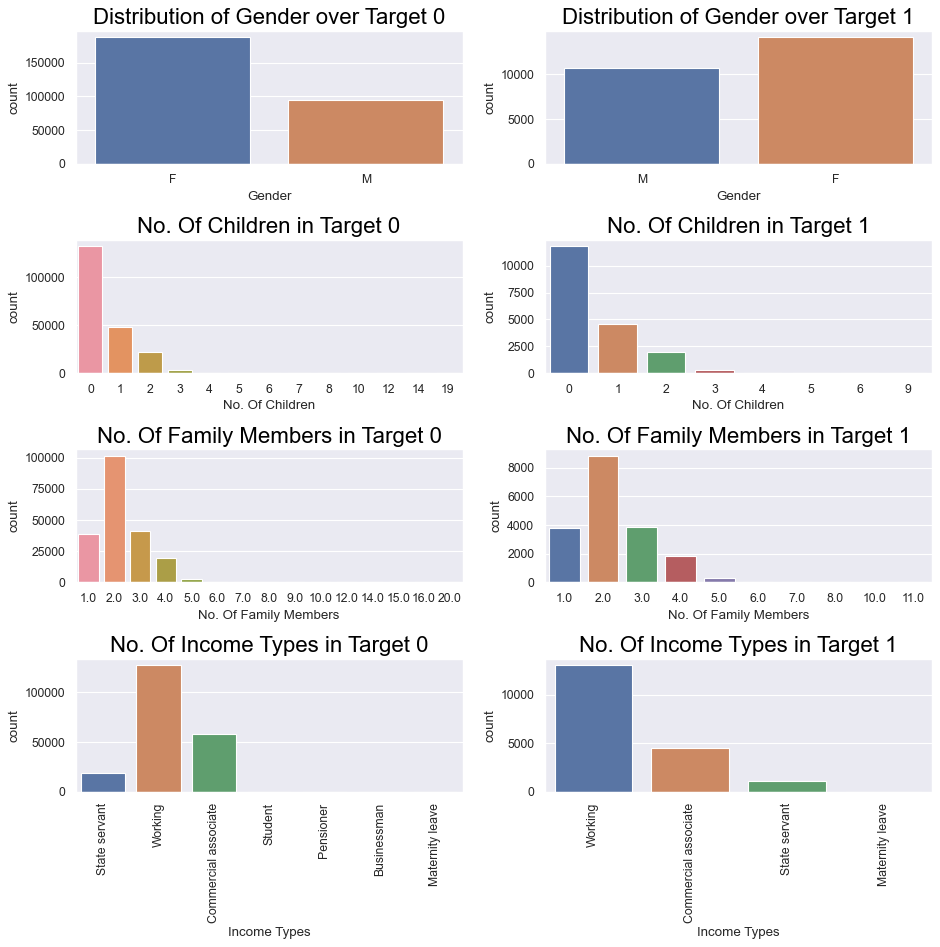

In [37]:
# Finding the frequency of CODE_GENDER for Target = 0

# adjust figure size
plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="darkgrid")

# subplot 1: CODE_GENDER
plt.subplot(4, 2, 1)
sns.countplot(x='CODE_GENDER', data=subset_df_tar0)
plt.xlabel('Gender')
plt.title('Distribution of Gender over Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)

# Finding the frequency of CODE_GENDER for Target = 1
# subplot 2: CODE_GENDER
plt.subplot(4, 2, 2)
sns.countplot(x='CODE_GENDER', data=subset_df_tar1)
plt.xlabel('Gender')
plt.title('Distribution of Gender over Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)


# Finding the frequency of CNT_CHILDREN for Target = 0
# subplot 3: CNT_CHILDREN
plt.subplot(4, 2, 3)
sns.countplot(x='CNT_CHILDREN', data=subset_df_tar0.dropna())
plt.xlabel('No. Of Children')
plt.title('No. Of Children in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)

# Finding the frequency of CNT_CHILDREN for Target = 1
# subplot 4: CNT_CHILDREN
plt.subplot(4, 2, 4)
sns.countplot(x='CNT_CHILDREN', data=subset_df_tar1.dropna())
plt.xlabel('No. Of Children')
plt.title('No. Of Children in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)

# Finding the frequency of CNT_FAM_MEMBERS for Target = 0
# subplot 5: CNT_FAM_MEMBERS
plt.subplot(4, 2, 5)
sns.countplot(x='CNT_FAM_MEMBERS', data=subset_df_tar0.dropna())
plt.xlabel('No. Of Family Members')
plt.title('No. Of Family Members in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)

# Finding the frequency of CNT_FAM_MEMBERS for Target = 1
# subplot 6: CNT_FAM_MEMBERS
plt.subplot(4, 2, 6)
sns.countplot(x='CNT_FAM_MEMBERS', data=subset_df_tar1.dropna())
plt.xlabel('No. Of Family Members')
plt.title('No. Of Family Members in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)

# Finding the frequency of NAME_INCOME_TYPE for Target = 0
# subplot 7: NAME_INCOME_TYPE
plt.subplot(4, 2, 7)
sns.countplot(x='NAME_INCOME_TYPE', data=subset_df_tar0.dropna())
plt.xlabel('Income Types')
plt.title('No. Of Income Types in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)

# Finding the frequency of NAME_INCOME_TYPE for Target = 1
# subplot 8: NAME_INCOME_TYPE
plt.subplot(4, 2, 8)
sns.countplot(x='NAME_INCOME_TYPE', data=subset_df_tar1.dropna())
plt.xlabel('Income Types')
plt.title('No. Of Income Types in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()
plt.show()

 Inference from above plot :
- No impact on the Defaulters and Non-defaulters list when Count of Family Members(Dependents), Count of Children and Income Types are  being considered for Analysis
- No conclusion can be drawn as such but it's seen than the count of females in the defaulter list are usually higher than the count of males in the same category


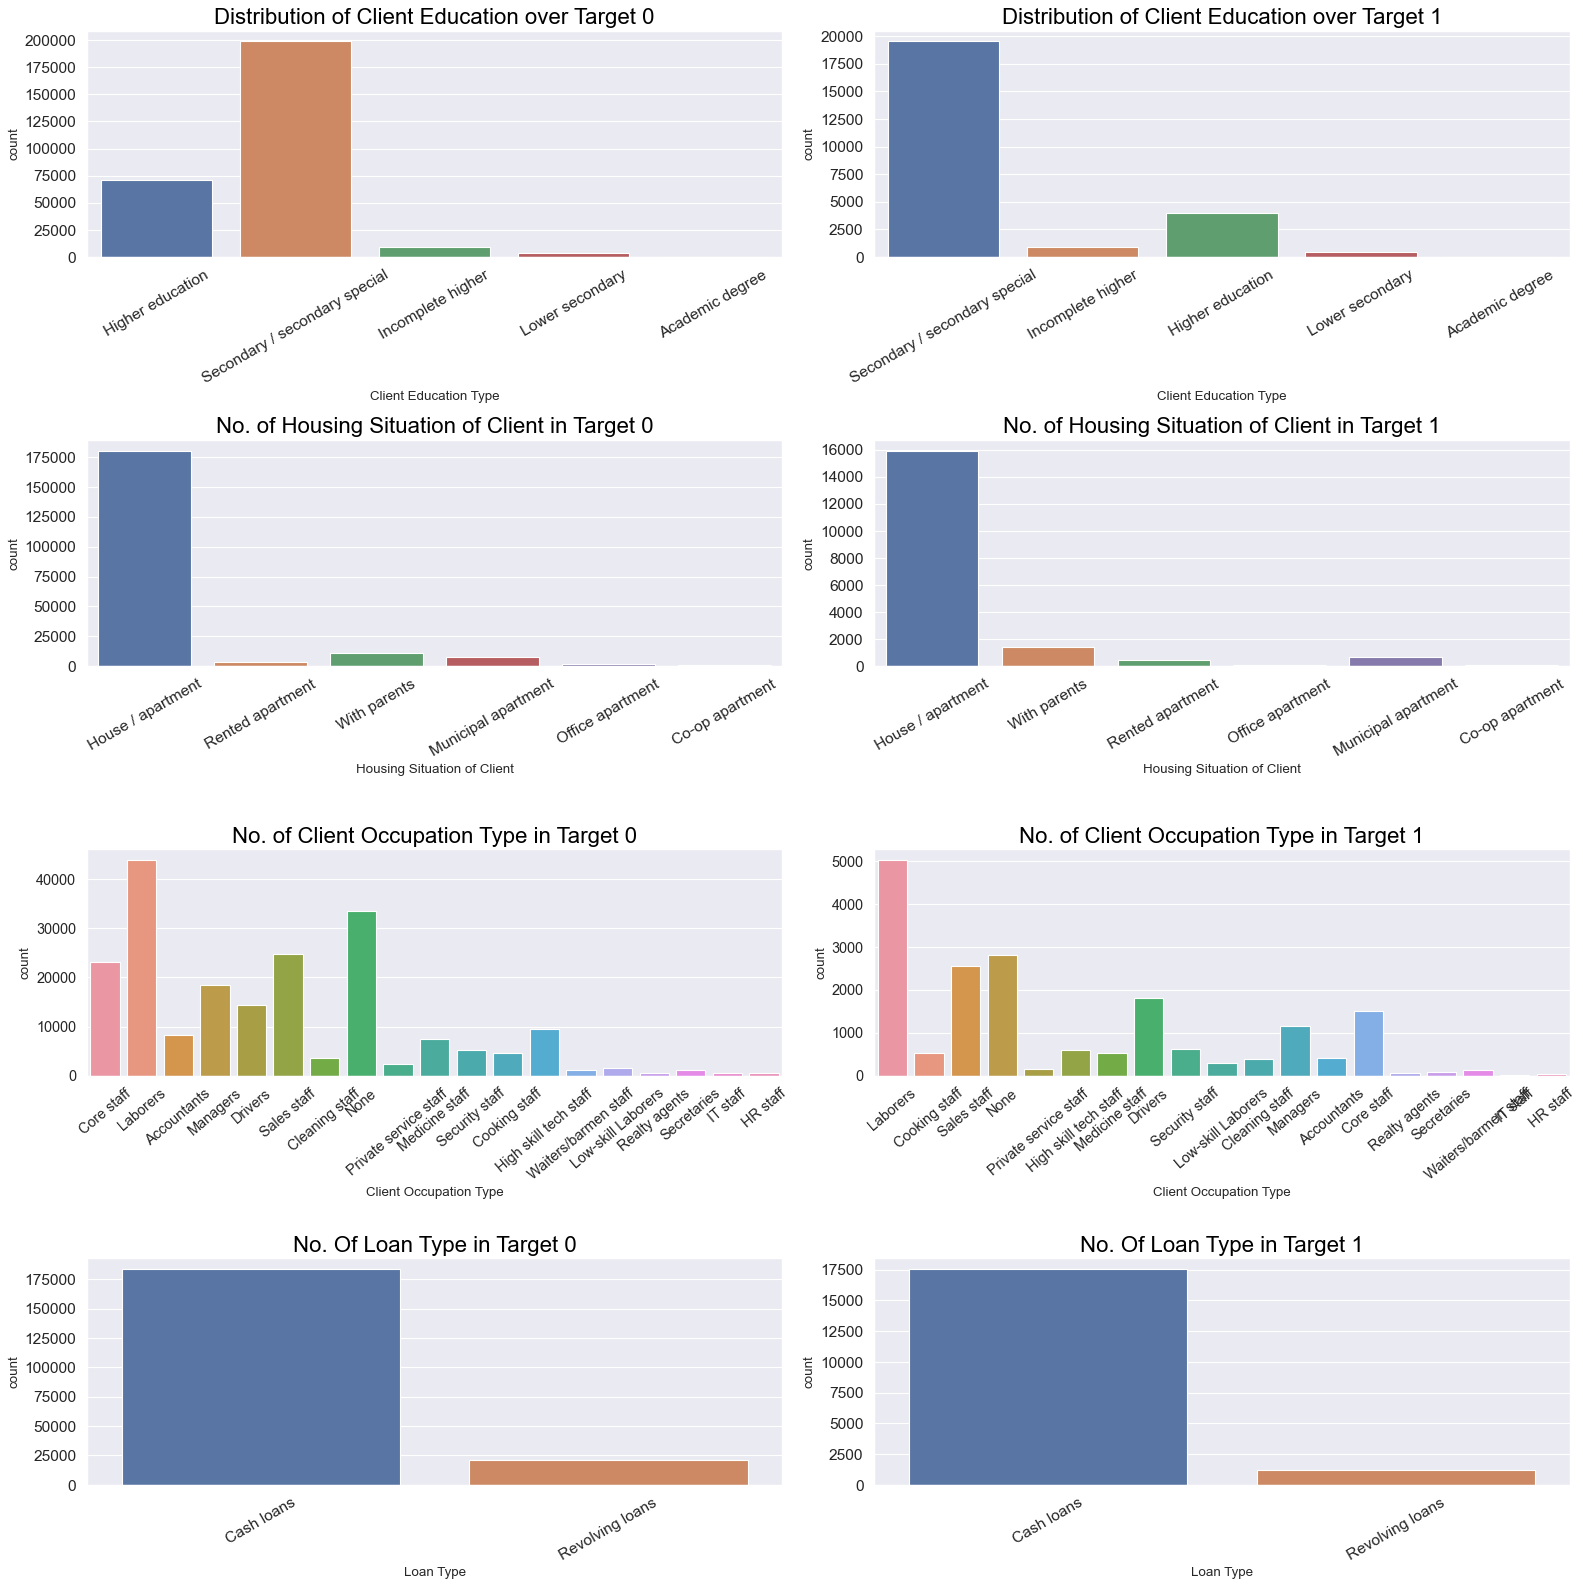

In [38]:
# Finding the frequency of NAME_EDUCATION_TYPE for Target = 0

# adjust figure size
plt.figure(figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="darkgrid")

# subplot 1: NAME_EDUCATION_TYPE
plt.subplot(4, 2, 1)
sns.countplot(x='NAME_EDUCATION_TYPE', data=subset_df_tar0)
plt.xlabel('Client Education Type')
plt.title('Distribution of Client Education over Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=0)

# Finding the frequency of NAME_EDUCATION_TYPE for Target = 1
# subplot 2: NAME_EDUCATION_TYPE
plt.subplot(4, 2, 2)
sns.countplot(x='NAME_EDUCATION_TYPE', data=subset_df_tar1)
plt.xlabel('Client Education Type')
plt.title('Distribution of Client Education over Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=0)


# Finding the frequency of NAME_HOUSING_TYPE for Target = 0
# subplot 3: NAME_HOUSING_TYPE
plt.subplot(4, 2, 3)
sns.countplot(x='NAME_HOUSING_TYPE', data=subset_df_tar0.dropna())
plt.xlabel('Housing Situation of Client')
plt.title('No. of Housing Situation of Client in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=0)

# Finding the frequency of NAME_HOUSING_TYPE for Target = 1
# subplot 4: NAME_HOUSING_TYPE
plt.subplot(4, 2, 4)
sns.countplot(x='NAME_HOUSING_TYPE', data=subset_df_tar1.dropna())
plt.xlabel('Housing Situation of Client')
plt.title('No. of Housing Situation of Client in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=0)

# Finding the frequency of OCCUPATION_TYPE for Target = 0
# subplot 5: OCCUPATION_TYPE
plt.subplot(4, 2, 5)
sns.countplot(x='OCCUPATION_TYPE', data=subset_df_tar0.dropna())
plt.xlabel('Client Occupation Type')
plt.title('No. of Client Occupation Type in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=13, rotation=40)
plt.yticks(fontsize=13, rotation=0)

# Finding the frequency of OCCUPATION_TYPE for Target = 1
# subplot 6: OCCUPATION_TYPE
plt.subplot(4, 2, 6)
sns.countplot(x='OCCUPATION_TYPE', data=subset_df_tar1.dropna())
plt.xlabel('Client Occupation Type')
plt.title('No. of Client Occupation Type in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=13, rotation=40)
plt.yticks(fontsize=13, rotation=0)

# Finding the frequency of NAME_CONTRACT_TYPE for Target = 0
# subplot 7: NAME_INCOME_TYPE
plt.subplot(4, 2, 7)
sns.countplot(x='NAME_CONTRACT_TYPE', data=subset_df_tar0.dropna())
plt.xlabel('Loan Type')
plt.title('No. Of Loan Type in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=0)

# Finding the frequency of NAME_CONTRACT_TYPE for Target = 1
# subplot 8: NAME_CONTRACT_TYPE
plt.subplot(4, 2, 8)
sns.countplot(x='NAME_CONTRACT_TYPE', data=subset_df_tar1.dropna())
plt.xlabel('Loan Type')
plt.title('No. Of Loan Type in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()

 Inference from the above plot :
- No impact on the Defaulters and Non-defaulters list when Client's Education, Housing Situation, Occupation and Loan Type are being considered for Analysis

##### Univariate Analysis on Categorical and Numerical Variables(Miscellaneous)

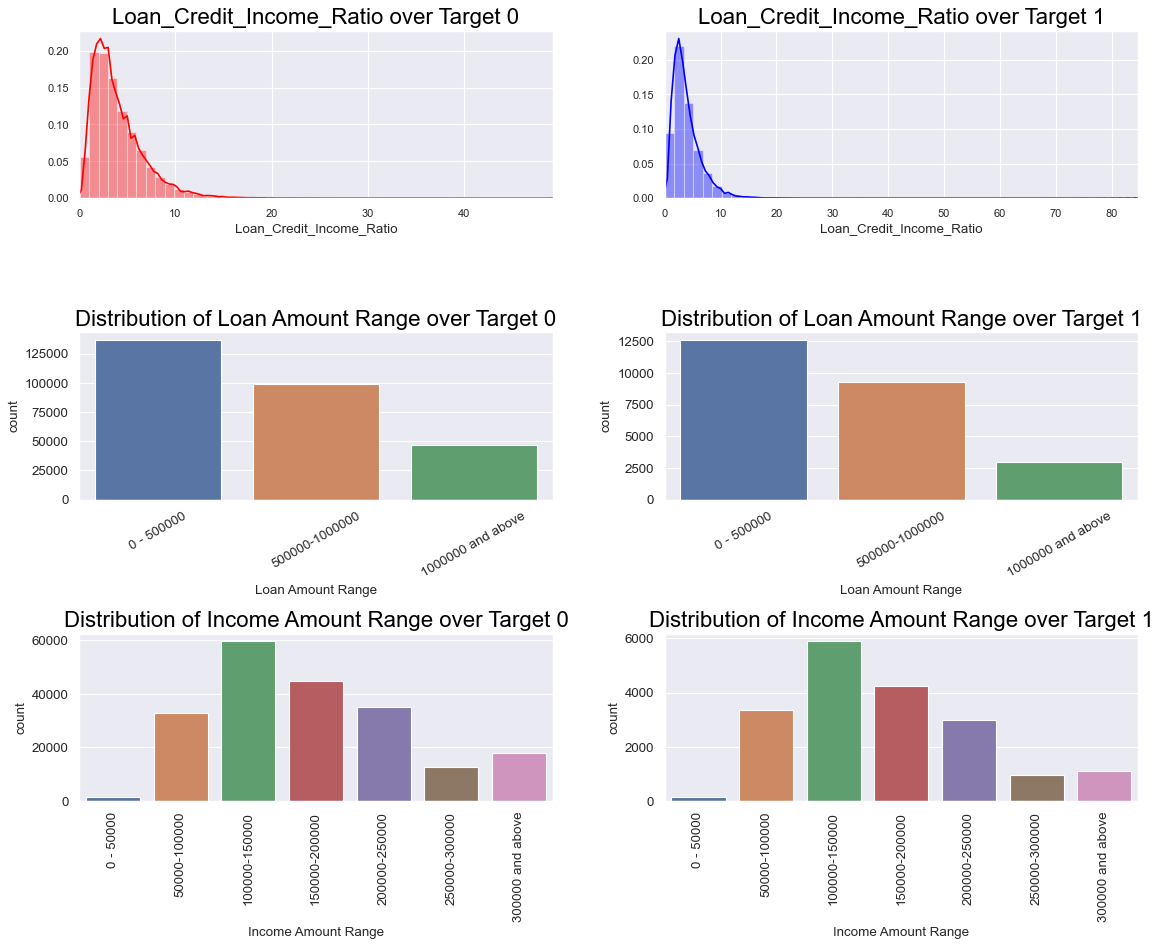

In [39]:

# Finding the frequency of Loan_Credit_Income_Ratio for Target = 0

# adjust figure size
plt.figure(figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

sns.set(style="darkgrid")
# subplot 1: Loan_Credit_Income_Ratio
plt.subplot(3, 2, 1)
sns.distplot(subset_df_tar0['Loan_Credit_Income_Ratio'].dropna(), color='red')
plt.xlim([0,  max(subset_df_tar0['Loan_Credit_Income_Ratio'])])
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Loan_Credit_Income_Ratio')
plt.title('Loan_Credit_Income_Ratio over Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})


# Finding the frequency of Loan_Credit_Income_Ratio for Target = 1
# subplot 2: Loan_Credit_Income_Ratio
plt.subplot(3, 2, 2)
sns.distplot(subset_df_tar1['Loan_Credit_Income_Ratio'].dropna(), color='blue')
plt.xlim([0,  max(subset_df_tar1['Loan_Credit_Income_Ratio'])])
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Loan_Credit_Income_Ratio')
plt.title('Loan_Credit_Income_Ratio over Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of loan_amnt_range for Target = 0
# subplot 3: loan_amnt_range
plt.subplot(3, 2, 3)
sns.countplot(x='loan_amnt_range', data=subset_df_tar0)
plt.xlabel('Loan Amount Range')
plt.title('Distribution of Loan Amount Range over Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12, rotation=0)

# Finding the frequency of loan_amnt_range for Target = 1
# subplot 4: loan_amnt_range
plt.subplot(3, 2, 4)
sns.countplot(x='loan_amnt_range', data=subset_df_tar1)
plt.xlabel('Loan Amount Range')
plt.title('Distribution of Loan Amount Range over Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12, rotation=0)


# Finding the frequency of income_amnt_range for Target = 0
# subplot 3: income_amnt_range
plt.subplot(3, 2, 5)
sns.countplot(x='income_amnt_range', data=subset_df_tar0.dropna())
plt.xlabel('Income Amount Range')
plt.title('Distribution of Income Amount Range over Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)

# Finding the frequency of income_amnt_range for Target = 1
# subplot 4: income_amnt_range
plt.subplot(3, 2, 6)
sns.countplot(x='income_amnt_range', data=subset_df_tar1.dropna())
plt.xlabel('Income Amount Range')
plt.title('Distribution of Income Amount Range over Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

 Inference from above plot :
- No impact on the Defaulters and Non-defaulters list when Client's Loan Credit Income Ratio, Loan Amount Range and Income Amount range are  being considered for Analysis


##### Bivariate analysis on Numerical and Categorical Varibles

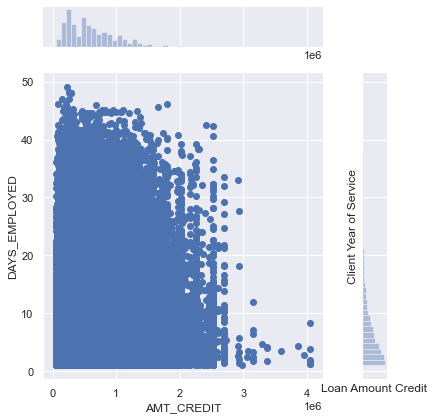

In [40]:
# Finding the Distribution of Loan Amount Credit over Client's year of Service for Target = 0

sns.jointplot('AMT_CREDIT','DAYS_EMPLOYED',data=subset_df_tar0.dropna())
plt.xlabel('Loan Amount Credit')
plt.ylabel('Client Year of Service')
plt.xticks(fontsize=11, rotation=90)
plt.tight_layout()
plt.show()

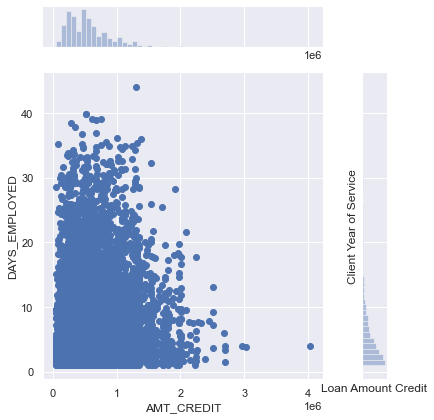

In [41]:
# Finding the Distribution of Loan Amount Credit over Client's year of Service for Target = 1

sns.jointplot('AMT_CREDIT','DAYS_EMPLOYED',data=subset_df_tar1.dropna())
plt.xlabel('Loan Amount Credit')
plt.ylabel('Client Year of Service')
plt.xticks(fontsize=11, rotation=90)
plt.tight_layout()
plt.show()

 Inference from above two plots :
- No significant impact on the Defaulters and Non-defaulters list is observed when Bi-variate analyis Methodology is performed on Loan Amount Credit and Client's year of service
- Although the scatter around the Defaulter's list is signficantly lower compared to Non-defaulter's list
- **This indicates that the Defaulter's list are considerd around 0 - 30 years of employment as compared with the non-defaulters**

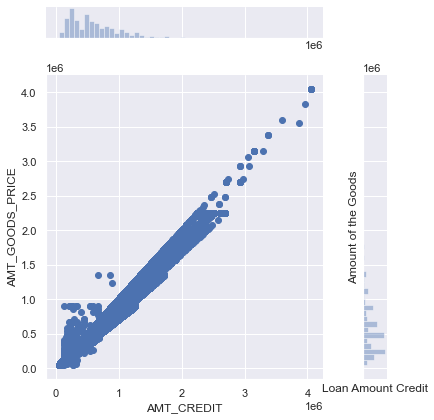

In [42]:
# Finding the Distribution of Loan Amount Credit over Amount of the Goods for Target = 0

sns.jointplot('AMT_CREDIT','AMT_GOODS_PRICE',data=subset_df_tar0.dropna())
plt.xlabel('Loan Amount Credit')
plt.ylabel('Amount of the Goods')
plt.xticks(fontsize=11, rotation=90)
plt.tight_layout()
plt.show()

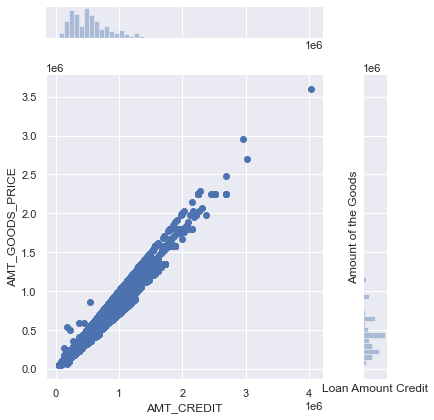

In [43]:
# Finding the Distribution of Loan Amount Credit over Amount of the Goods for Target = 1

sns.jointplot('AMT_CREDIT','AMT_GOODS_PRICE',data=subset_df_tar1.dropna())
plt.xlabel('Loan Amount Credit')
plt.ylabel('Amount of the Goods')
plt.xticks(fontsize=11, rotation=90)
plt.tight_layout()
plt.show()

Inference from above two plots :
- We can see that there is no significant impact when we perform bivariate analysis on Loan Amount Credit and Amount of Goods on Defaulters and Non-Defaulters.

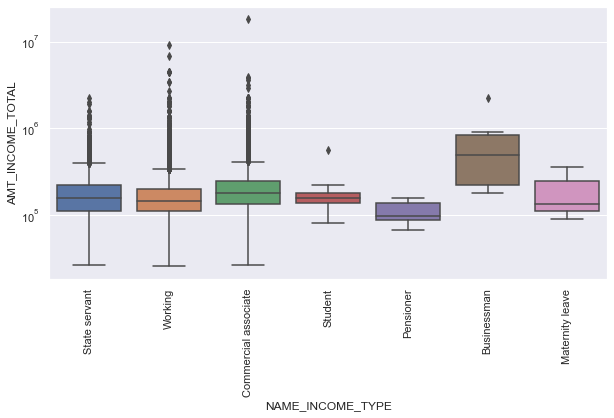

In [44]:
# Finding the Client Total Income over Income Type for Target = 0

plt.figure(figsize=(10,5))
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=subset_df_tar0.dropna())
plt.yscale('log')
plt.xticks(fontsize=11, rotation=90)
plt.show()

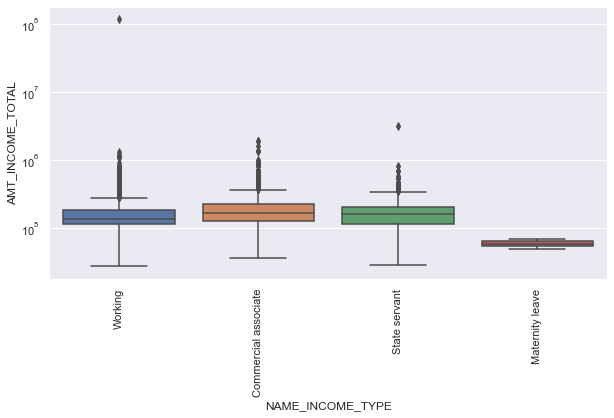

In [45]:
# Finding the Client Total Income over Income Type for Target = 1

plt.figure(figsize=(10,5))
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=subset_df_tar1.dropna())
plt.yscale('log')
plt.xticks(fontsize=11, rotation=90)
plt.show()

 Inference from above two plots :
- Comparing the Defaulters list and the Non-Defaulters list, we can see that the Pensioners and Students are less likely to default.

#####  Finding the correlation between the defaulters and non-defaulters 
- **Correlation of Numerical Variables between the Non Defaulters (Target 0):**

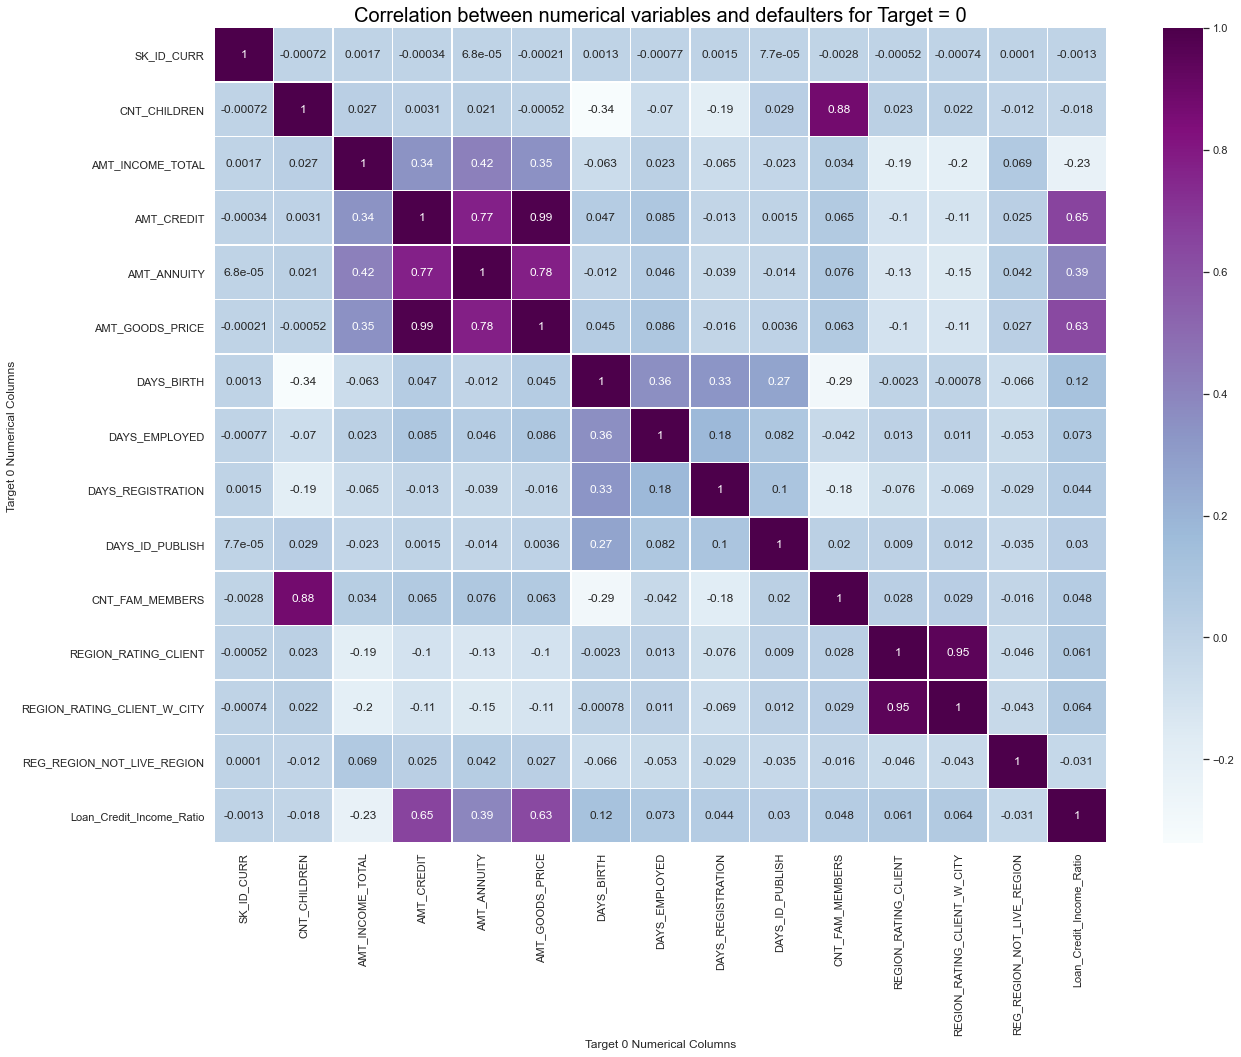

In [46]:
# Find correlation for both the data sets 

subset_df_tar0_corr = subset_df_tar0.loc[:,subset_df_tar0.columns != 'TARGET'].apply(pd.to_numeric, errors='ignore')
subset_df_tar0_corr
corr_coeff = subset_df_tar0_corr.corr()
corr_coeff
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_coeff, cmap="BuPu", annot=True, linewidths=.5, ax=ax)
plt.xlabel('Target 0 Numerical Columns', fontsize=12)
plt.ylabel('Target 0 Numerical Columns', fontsize= 12)
plt.title('Correlation between numerical variables and defaulters for Target = 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.show()

- **Correlation of Numerical Variables between the Defaulters (Target 1):**


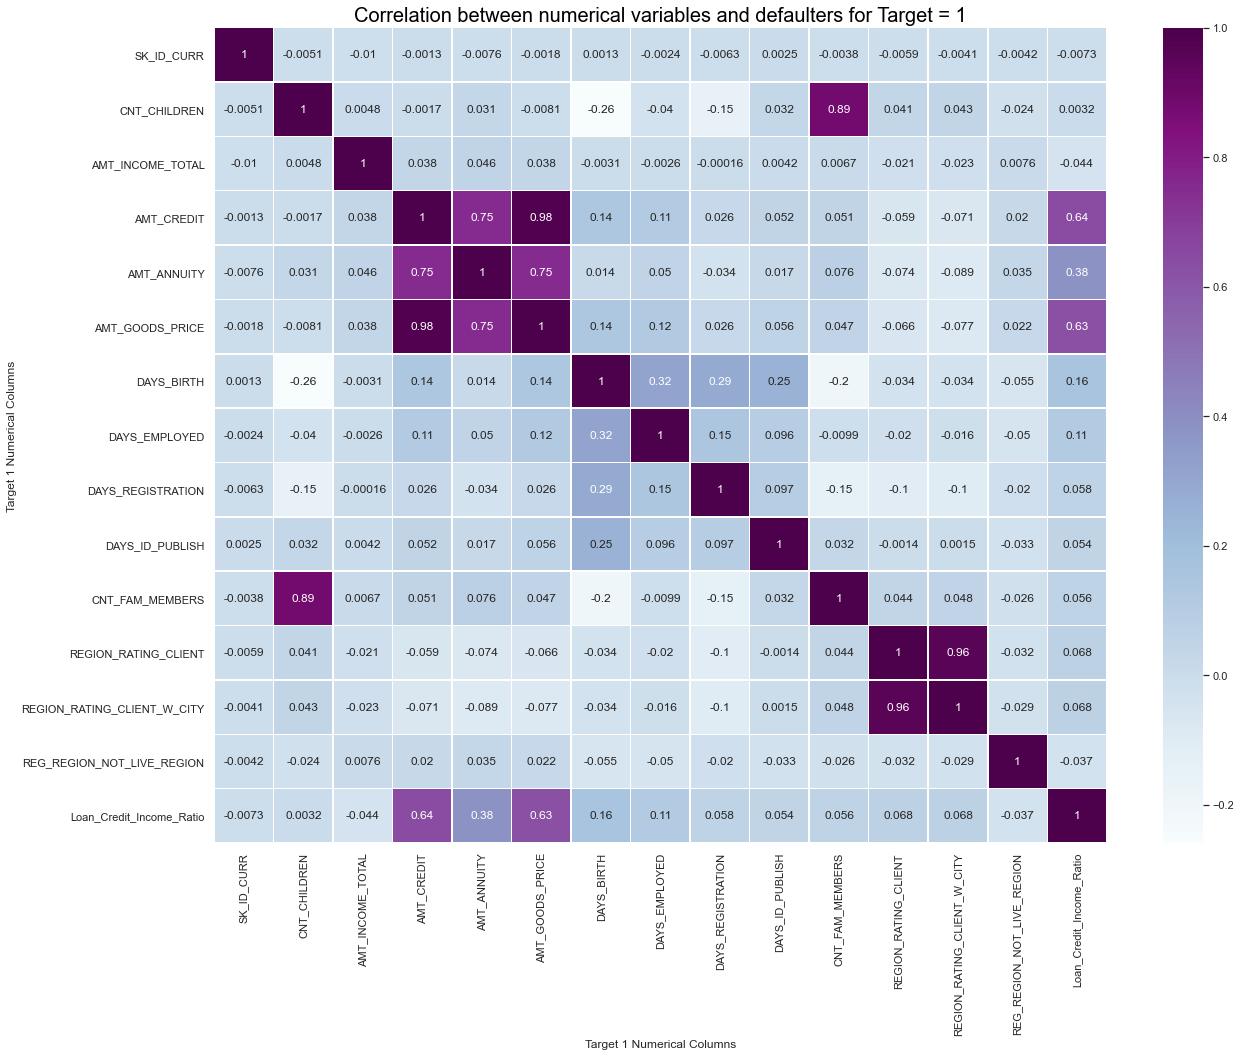

In [47]:
subset_df_tar1_corr = subset_df_tar1.loc[:,subset_df_tar1.columns != 'TARGET'].apply(pd.to_numeric, errors='ignore')
subset_df_tar1_corr
corr_coeff = subset_df_tar1_corr.corr()
corr_coeff
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_coeff, cmap="BuPu", annot=True, linewidths=.5, ax=ax)
plt.xlabel('Target 1 Numerical Columns', fontsize=12)
plt.ylabel('Target 1 Numerical Columns', fontsize= 12)
plt.title('Correlation between numerical variables and defaulters for Target = 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.show()

 As inferred from the heatmap 
- The maroon boxes show the most correlated sub-sectors. Specifically, (0.98), (0.96), (0.89), and (0.75) are the most correlated pairs. 
- Credit amount and Amount of Goods Price are highly correlated.
- Credit amount and annuity amount are also highly correlated.

##### Analysis on Previous Application
- Importing previous application data and merging with application set

In [48]:
#Read Previous application data
pdf = pd.read_csv("previous_application.csv") 
pdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#Merging previous and application dataframes
merge_df = pd.merge(ndf, pdf, on=['SK_ID_CURR', 'SK_ID_CURR'], how='left')
merge_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Loan_Credit_Income_Ratio,loan_amnt_range,income_amnt_range,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,2,2,0,Business Entity Type 3,2.007889,0 - 500000,200000-250000,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,NaN,11.671233,6.934247,Laborers,1.0,2,2,0,Government,2.000000,0 - 500000,50000-100000,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [50]:
def drop_columns(df):
     drop = [x for x in df if x.endswith('_y')]
     df.drop(drop, axis=1, inplace=True)

def rename_columns(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)

In [51]:
# Dropping irrelevant columns       
drop_columns(merge_df)
merge_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Loan_Credit_Income_Ratio,loan_amnt_range,income_amnt_range,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,2,2,0,Business Entity Type 3,2.007889,0 - 500000,200000-250000,1038818.0,179055.0,0.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,1810518.0,900000.0,NaN,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,2636178.0,337500.0,0.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,2396755.0,68809.5,6885.0,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,NaN,11.671233,6.934247,Laborers,1.0,2,2,0,Government,2.000000,0 - 500000,50000-100000,1564014.0,24282.0,4860.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [52]:
# Renaming irrelevant columns            
rename_columns(merge_df)
merge_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Loan_Credit_Income_Ratio,loan_amnt_range,income_amnt_range,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,2,2,0,Business Entity Type 3,2.007889,0 - 500000,200000-250000,1038818.0,179055.0,0.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,1810518.0,900000.0,NaN,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,2636178.0,337500.0,0.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,2396755.0,68809.5,6885.0,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,NaN,11.671233,6.934247,Laborers,1.0,2,2,0,Government,2.000000,0 - 500000,50000-100000,1564014.0,24282.0,4860.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [53]:
merge_df.shape

(1430155, 60)

##### Again dividing the merged dataset into Target 1 and Target 0

In [54]:
#Divide the application data into two sets
merge_tar0_df = merge_df.loc[merge_df['TARGET'] == 0]
merge_tar1_df = merge_df.loc[merge_df['TARGET'] == 1]
merge_tar0_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Loan_Credit_Income_Ratio,loan_amnt_range,income_amnt_range,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,1810518.0,900000.0,NaN,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,2636178.0,337500.0,0.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,0,School,4.790750,1000000 and above,250000-300000,2396755.0,68809.5,6885.0,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,NaN,11.671233,6.934247,Laborers,1.0,2,2,0,Government,2.000000,0 - 500000,50000-100000,1564014.0,24282.0,4860.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,2,2,0,Business Entity Type 3,2.316167,0 - 500000,100000-150000,2078043.0,675000.0,NaN,THURSDAY,15.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-181.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0


In [55]:
merge_tar1_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Loan_Credit_Income_Ratio,loan_amnt_range,income_amnt_range,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,2,2,0,Business Entity Type 3,2.007889,0 - 500000,200000-250000,1038818.0,179055.0,0.0,SATURDAY,9.0,Y,1.0,0.0,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
97,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,51.298630,7.200000,18.008219,5.005479,Cooking staff,1.0,3,2,0,Business Entity Type 3,8.711040,500000-1000000,100000-150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,47.895890,3.457534,3.238356,2.819178,Laborers,2.0,2,2,0,Business Entity Type 3,5.894222,1000000 and above,200000-250000,1472630.0,0.0,NaN,SATURDAY,14.0,Y,1.0,NaN,NaN,NaN,XAP,Approved,-1172.0,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1.0,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
164,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,47.895890,3.457534,3.238356,2.819178,Laborers,2.0,2,2,0,Business Entity Type 3,5.894222,1000000 and above,200000-250000,2426800.0,157500.0,NaN,FRIDAY,15.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-1467.0,Cash through the bank,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,high,Cash X-Sell: high,365243.0,-1437.0,-747.0,-1167.0,-1163.0,1.0
165,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,47.895890,3.457534,3.238356,2.819178,Laborers,2.0,2,2,0,Business Entity Type 3,5.894222,1000000 and above,200000-250000,1021215.0,675000.0,NaN,FRIDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Refused,-1075.0,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,36.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


##### Univariate and Bivariate Analysis on Previous Application
- *Numerical Variables*

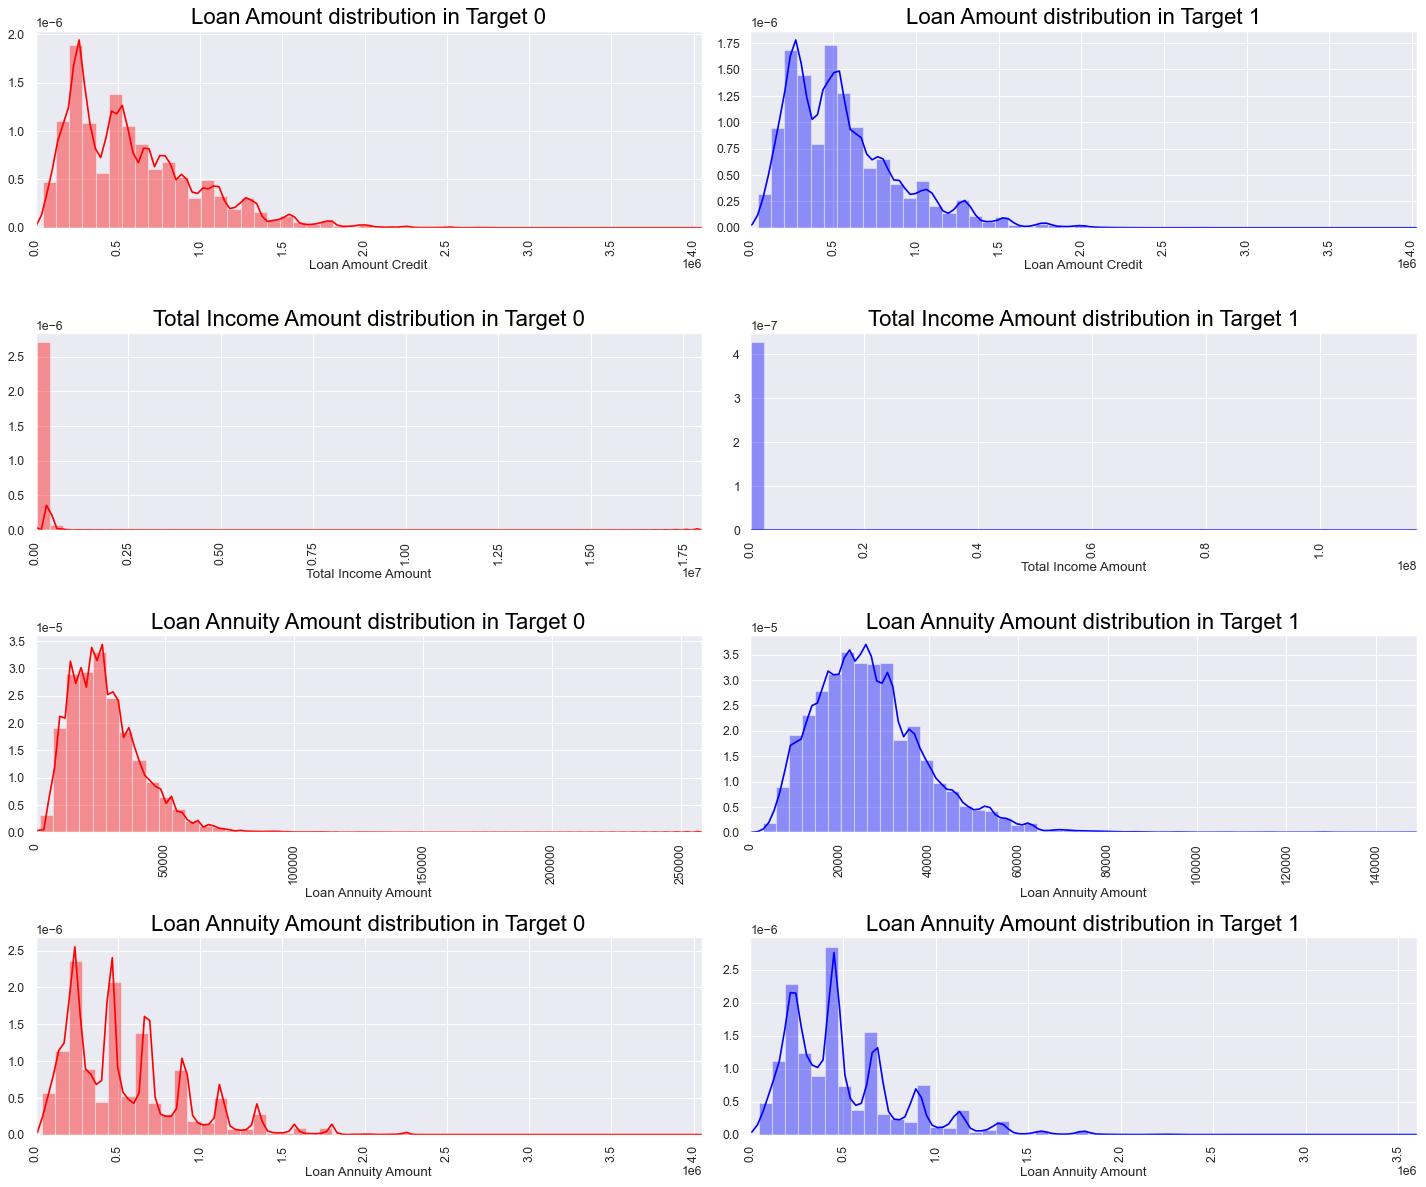

In [56]:
# adjust figure size
plt.figure(figsize=(18,15), dpi=80, facecolor='w', edgecolor='k')

# Finding the frequency of AMT_CREDIT for Target = 0
# subplot 1: AMT_CREDIT
plt.subplot(4, 2, 1)
sns.distplot(merge_tar0_df['AMT_CREDIT'].dropna(), color='red')
plt.xlim([0,  max(merge_tar0_df['AMT_CREDIT'])])
plt.xlabel('Loan Amount Credit')
plt.title('Loan Amount distribution in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)

# Finding the frequency of AMT_CREDIT for Target = 1
# subplot 2: AMT_CREDIT
plt.subplot(4, 2, 2)
sns.distplot(merge_tar1_df['AMT_CREDIT'].dropna(), color='blue')
plt.xlim([0, max(merge_tar1_df['AMT_CREDIT'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Loan Amount Credit')
plt.title('Loan Amount distribution in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})


# Finding the frequency of AMT_INCOME_TOTAL for Target = 0
# subplot 3: AMT_INCOME_TOTAL
plt.subplot(4, 2, 3)
sns.distplot(merge_tar0_df['AMT_INCOME_TOTAL'].dropna(), color='red')
plt.xlim([0, max(merge_tar0_df['AMT_INCOME_TOTAL'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Total Income Amount')
plt.title('Total Income Amount distribution in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of AMT_INCOME_TOTAL for Target = 1
# subplot 4: AMT_INCOME_TOTAL
plt.subplot(4, 2, 4)
sns.distplot(merge_tar1_df['AMT_INCOME_TOTAL'].dropna(), color='blue')
plt.xlim([0,  max(merge_tar1_df['AMT_INCOME_TOTAL'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Total Income Amount')
plt.title('Total Income Amount distribution in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})


# Finding the frequency of AMT_ANNUITY for Target = 0
# subplot 5: AMT_ANNUITY
plt.subplot(4, 2, 5)
sns.distplot(merge_tar0_df['AMT_ANNUITY'].dropna(), color='red')
plt.xlim([0, max(merge_tar0_df['AMT_ANNUITY'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Loan Annuity Amount')
plt.title('Loan Annuity Amount distribution in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of AMT_ANNUITY for Target = 1
# subplot 6: AMT_ANNUITY
plt.subplot(4, 2, 6)
sns.distplot(merge_tar1_df['AMT_ANNUITY'].dropna(), color='blue')
plt.xlim([0,  max(merge_tar1_df['AMT_ANNUITY'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Loan Annuity Amount')
plt.title('Loan Annuity Amount distribution in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of AMT_GOODS_PRICE for Target = 0
# subplot 5: AMT_GOODS_PRICE
plt.subplot(4, 2, 7)
sns.distplot(merge_tar0_df['AMT_GOODS_PRICE'].dropna(), color='red')
plt.xlim([0, max(merge_tar0_df['AMT_GOODS_PRICE'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Loan Annuity Amount')
plt.title('Loan Annuity Amount distribution in Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

# Finding the frequency of AMT_GOODS_PRICE for Target = 1
# subplot 6: AMT_GOODS_PRICE
plt.subplot(4, 2, 8)
sns.distplot(merge_tar1_df['AMT_GOODS_PRICE'].dropna(), color='blue')
plt.xlim([0,  max(merge_tar1_df['AMT_GOODS_PRICE'])])
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11, rotation=0)
plt.xlabel('Loan Annuity Amount')
plt.title('Loan Annuity Amount distribution in Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})

plt.tight_layout()
plt.show()

 To begin with our analysis we have used Univariate Methodology on significant numerical variables present in our dataset.
 Inference from the above plot :
- 1) No significant impact on the Defaulters and Non-defaulters list are observed when Client's Total Income and Loan Amount Credit are being considered for Analysis
- 2) Similar observations are seen when compared with Client's Loan Annuity Amount and Loan Goods Amount



- *Numerical Variables and Categorical Variables*

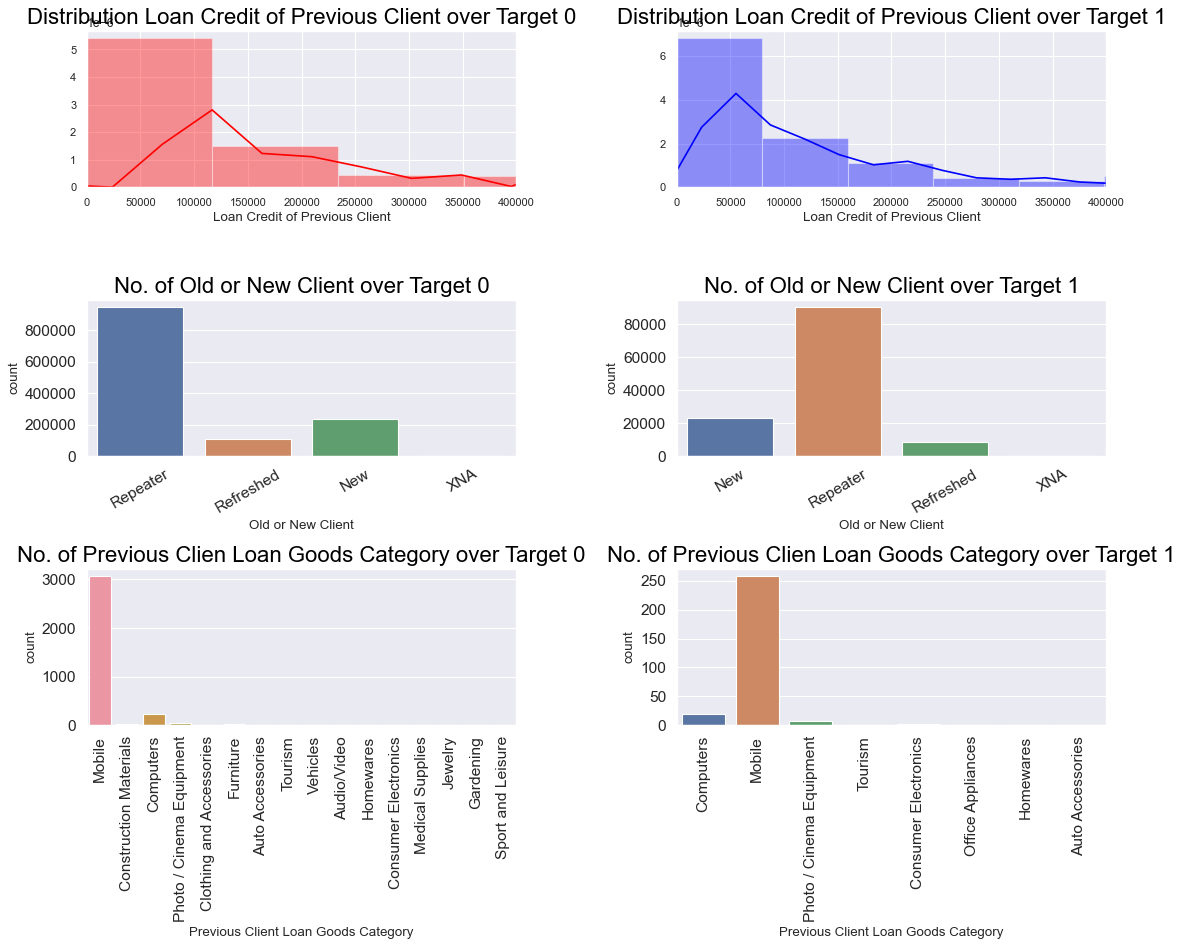

In [57]:
# adjust figure size
plt.figure(figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

sns.set(style="darkgrid")

# Finding the frequency of AMT_APPLICATION for Target = 0
# subplot 1: AMT_APPLICATION
plt.subplot(3, 2, 1)
sns.distplot(merge_tar0_df['AMT_APPLICATION'].dropna(), color='red')
plt.xlim([0,  400000])
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Loan Credit of Previous Client')
plt.title('Distribution Loan Credit of Previous Client over Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})


# Finding the frequency of AMT_APPLICATION for Target = 1
# subplot 2: AMT_APPLICATION
plt.subplot(3, 2, 2)
sns.distplot(merge_tar1_df['AMT_APPLICATION'].dropna(), color='blue')
plt.xlim([0,  400000])
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Loan Credit of Previous Client')
plt.title('Distribution Loan Credit of Previous Client over Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})


# Finding the frequency of NAME_CLIENT_TYPE for Target = 0
# subplot 3: NAME_CLIENT_TYPE
plt.subplot(3, 2, 3)
sns.countplot(x='NAME_CLIENT_TYPE', data=merge_tar0_df)
plt.xlabel('Old or New Client')
plt.title('No. of Old or New Client over Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=0)

# Finding the frequency of NAME_CLIENT_TYPE for Target = 1
# subplot 4: NAME_CLIENT_TYPE
plt.subplot(3, 2, 4)
sns.countplot(x='NAME_CLIENT_TYPE', data=merge_tar1_df)
plt.xlabel('Old or New Client')
plt.title('No. of Old or New Client over Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=0)


# Finding the frequency of NAME_GOODS_CATEGORY for Target = 0
# subplot 3: NAME_GOODS_CATEGORY
plt.subplot(3, 2, 5)
sns.countplot(x='NAME_GOODS_CATEGORY', data=merge_tar0_df.dropna())
plt.xlabel('Previous Client Loan Goods Category')
plt.title('No. of Previous Clien Loan Goods Category over Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)

# Finding the frequency of NAME_GOODS_CATEGORY for Target = 1
# subplot 4: NAME_GOODS_CATEGORY
plt.subplot(3, 2, 6)
sns.countplot(x='NAME_GOODS_CATEGORY', data=merge_tar1_df.dropna())
plt.xlabel('Previous Client Loan Goods Category')
plt.title('No. of Previous Clien Loan Goods Category over Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()

To continue with our analysis we have used Univariate Methodology on significant numerical and categorical  variables present in our dataset: 
-- Inference from the above plot :
- No significant impact on the Defaulters and Non-defaulters list are observed when the above fields are being considered for Analysis

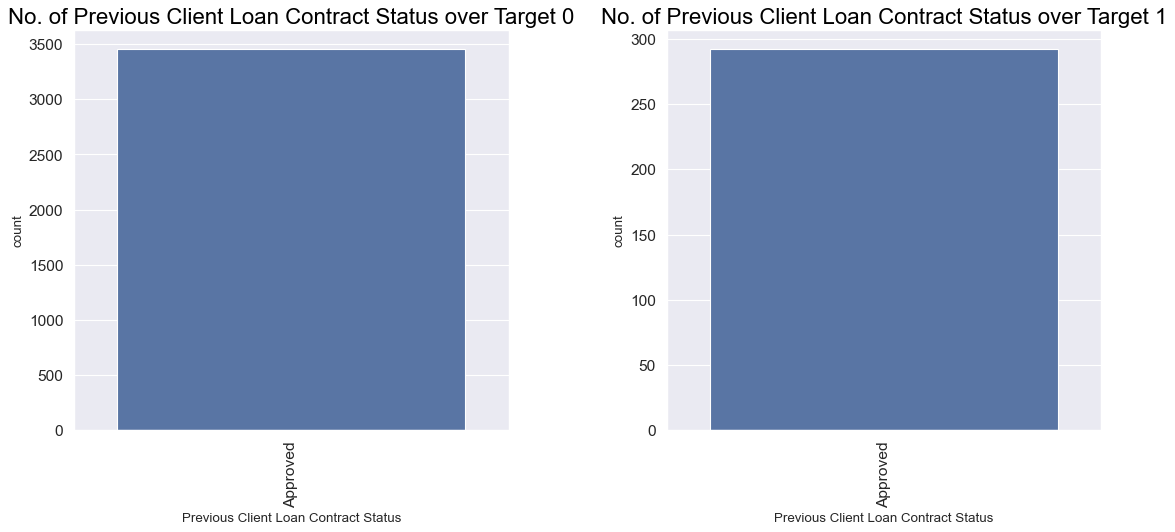

In [58]:
# Finding the frequency of AMT_APPLICATION for Target = 0

# adjust figure size
plt.figure(figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
sns.countplot(x='NAME_CONTRACT_STATUS', data=merge_tar0_df.dropna())
plt.xlabel('Previous Client Loan Contract Status')
plt.title('No. of Previous Client Loan Contract Status over Target 0', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)

plt.subplot(2, 2, 2)
sns.countplot(x='NAME_CONTRACT_STATUS', data=merge_tar1_df.dropna())
plt.xlabel('Previous Client Loan Contract Status')
plt.title('No. of Previous Client Loan Contract Status over Target 1', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'black'})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)


plt.tight_layout()
plt.show()

- No inference can be made from Previous Client Loan Contract Status between Defaulters and Non-defaulters